## About


This is a markdown file for studying advanced augmentations

In [4]:
import cv2
import matplotlib.pyplot as plt

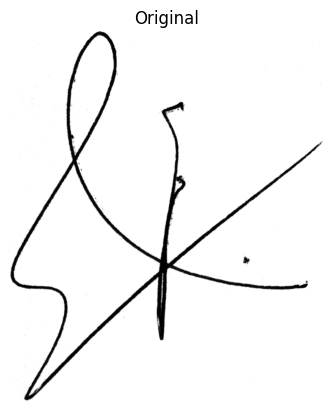

In [17]:
image = cv2.imread('/content/1.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_image = image

plt.imshow(image)
plt.axis('off')
plt.title('Original')
plt.show()

# Advanced augmentation
* It is done to obtain real world forgery secenario from the genuine signatures.

## 1. Elastic transform
Elastic transformation simulates random, smooth deformations like those in real-world scanned documents or handwritten images. It distorts the image spatially using displacement fields smoothed with a Gaussian filter.

In [10]:
!pip install albumentations

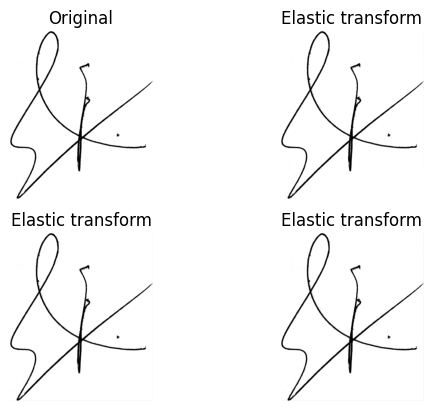

In [32]:
from albumentations import ElasticTransform
import matplotlib.pyplot as plt
import cv2

# Make sure 'image' is loaded if this cell is run independently
# image = cv2.imread('/content/1.tif')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# original_image = image # Assuming original_image is already defined


plt.subplot(2,2,1)
plt.imshow(original_image)
plt.title("Original")
plt.axis('off')

plt.subplot(2,2,2)
transform = ElasticTransform(alpha=1, sigma=1000, p=1.0)
augmented = transform(image=image)['image']
plt.imshow(augmented)
plt.title("Elastic transform")
plt.axis('off')

plt.subplot(2,2,3)
transform = ElasticTransform(alpha=1, sigma=5000, p=1.0)
augmented = transform(image=image)['image']
plt.imshow(augmented)
plt.title("Elastic transform")
plt.axis('off')

plt.subplot(2,2,4)
transform = ElasticTransform(alpha=1, sigma=10000, p=1.0)
augmented = transform(image=image)['image']
plt.imshow(augmented)
plt.title("Elastic transform")
plt.axis('off')


plt.show()